# Data Folkz

This assignment is part of your coursework at Data Folkz

# Description

Background and Objective :

Every year thousands of applications are being submitted by international students for admission in
colleges of the USA. It becomes an iterative task for the Education Department to know the total number
of applications received and then compare that data with the total number of applications successfully
accepted and visas processed. Hence to make the entire process easy, the education department in the US
analyzes the factors that influence the admission of a student into colleges. The objective of this exercise
is to analyze the same.

# Domain: Education

# Analysis Tasks:

Analyze the historical data and determine the key drivers for admission.

# Predictive:

● Find the missing values. (if any, perform missing value treatment)

● Find outliers (if any, then perform outlier treatment)

● Find the structure of the data set and if required, transform the numeric data type to factor and
vice-versa.

● Find whether the data is normally distributed or not. Use the plot to determine the same.

● Normalize the data if not normally distributed.

● Use variable reduction techniques to identify significant variables.

● Run logistic model to determine the factors that influence the admission process of a student
(Drop insignificant variables)

● Calculate the accuracy of the model and run validation techniques.

● Try other modelling techniques like decision tree and SVM and select a champion model

● Determine the accuracy rates for each kind of model

● Select the most accurate model

● Identify other Machine learning or statistical technique

In [1]:
# Importing ncessary package

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("college_admissions.csv")
df.head()

,admit,gre,gpa,ses,Gender_Male,Race,rank
0,0,380,3.61,1,0,3,3
1,1,660,3.67,2,0,2,3
2,1,800,4.00,2,0,2,1
3,1,640,3.19,1,1,2,4
4,0,520,2.93,3,1,2,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
admit          400 non-null int64
gre            400 non-null int64
gpa            400 non-null float64
ses            400 non-null int64
Gender_Male    400 non-null int64
Race           400 non-null int64
rank           400 non-null int64
dtypes: float64(1), int64(6)
memory usage: 21.9 KB


In [5]:
#The type of columns can be found as follows:


In [6]:
df.dtypes

admit            int64
gre              int64
gpa            float64
ses              int64
Gender_Male      int64
Race             int64
rank             int64
dtype: object

In [7]:
#Check shape of the data and whether there exist missing values:

In [8]:

print('Shape of the data:')
df.shape

Shape of the data:


(400, 7)

In [9]:
print('Missing values in columns:')
df.isnull().sum()

Missing values in columns:


admit          0
gre            0
gpa            0
ses            0
Gender_Male    0
Race           0
rank           0
dtype: int64

# Data Exploration

First of all, let us see the basic statistics of the data.

In [10]:
df.describe()

,admit,gre,gpa,ses,Gender_Male,Race,rank
count,400.000000,400.000000,400.000000,400.000000,400.000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,1.992500,0.475,1.962500,2.48500
std,0.466087,115.516536,0.380567,0.808751,0.500,0.823279,0.94446
min,0.000000,220.000000,2.260000,1.000000,0.000,1.000000,1.00000
25%,0.000000,520.000000,3.130000,1.000000,0.000,1.000000,2.00000
50%,0.000000,580.000000,3.395000,2.000000,0.000,2.000000,2.00000
75%,1.000000,660.000000,3.670000,3.000000,1.000,3.000000,3.00000
max,1.000000,800.000000,4.000000,3.000000,1.000,3.000000,4.00000


# Data Visualization


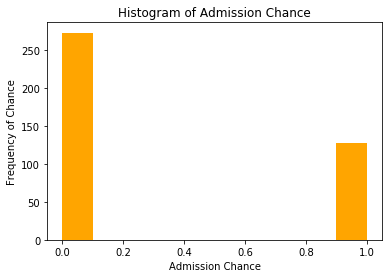

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(df['admit'],bins=10,color="orange")
plt.title('Histogram of Admission Chance')
plt.xlabel('Admission Chance')
plt.ylabel('Frequency of Chance')
plt.show()

box Plot of University Rating and The Chance of Admission

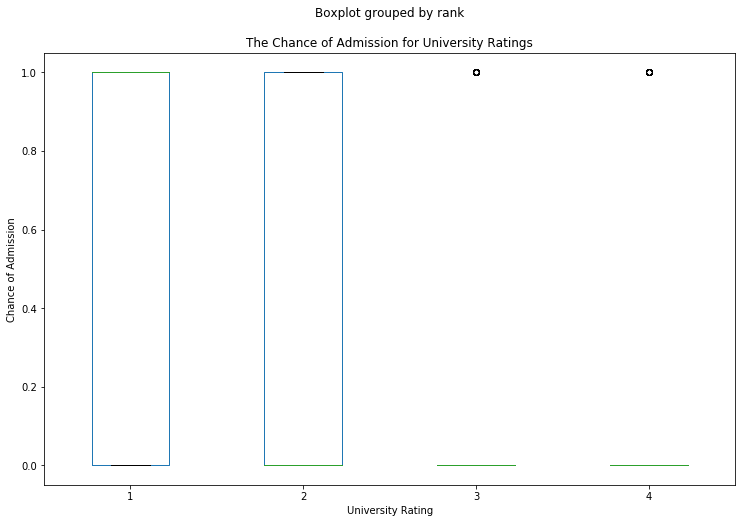

In [12]:
df.boxplot(column='admit',by='rank',grid=False,figsize=(12,8))
plt.title('The Chance of Admission for University Ratings')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')
plt.show()

As it can be seen from the boxplot chart, chance of admission is higher within the applicants of 1 and 2nd rated universities.

# Histogram of Numeric Variables¶


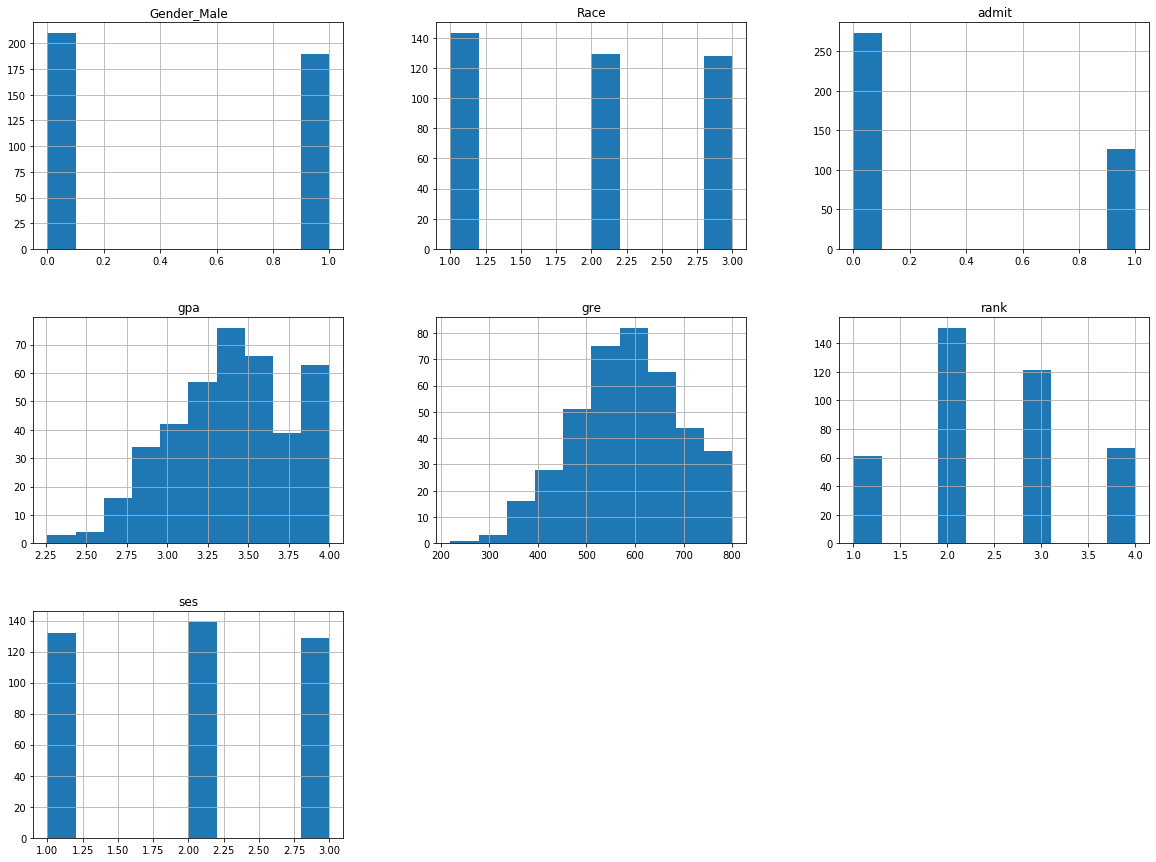

In [13]:
df.hist(bins=10, figsize=(20,15))
plt.show()

# Data Preperation

In [14]:
y=df['admit']
x=df.drop(['admit'],axis=1)


Data will be splitted using train_test_split module of scikitlearn library where splitting ratio is chosen as 20% for test data.

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

Data normalization is important in order to represent data in comparable scales.

In [16]:
from sklearn.preprocessing import MinMaxScaler
xs=MinMaxScaler()



In [17]:
X_train=xs.fit_transform(x_train)

In [18]:
X_test=xs.transform(x_test)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model=LogisticRegression()

In [21]:
model.fit(x_train,y_train)

C:\Users\jay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
model.score(x_test,y_test)

0.675

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
y_pred=model.predict(x_test)

In [25]:
confusion_matrix(y_test,y_pred)

array([[50,  5],
       [21,  4]], dtype=int64)

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79        55
           1       0.44      0.16      0.24        25

    accuracy                           0.68        80
   macro avg       0.57      0.53      0.51        80
weighted avg       0.62      0.68      0.62        80



# Training a Decision Tree Model

Import DecisionTreeClassifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

In [30]:
dtree = DecisionTreeClassifier()

In [31]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Predictions and Evaluation of Decision Tree¶

Create predictions from the test set and create a classification report and a confusion matrix.

In [33]:
predictions = dtree.predict(x_test)

In [34]:

from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72        55
           1       0.43      0.52      0.47        25

    accuracy                           0.64        80
   macro avg       0.60      0.61      0.60        80
weighted avg       0.66      0.64      0.65        80



In [36]:
print(confusion_matrix(y_test,predictions))

[[38 17]
 [12 13]]


# Training the Random Forest model

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc = RandomForestClassifier(n_estimators=600)

In [39]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

Predict the class of not.fully.paid for the X_test data.

In [40]:
predictions = rfc.predict(x_test)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78        55
           1       0.47      0.28      0.35        25

    accuracy                           0.68        80
   macro avg       0.59      0.57      0.57        80
weighted avg       0.64      0.68      0.65        80



In [43]:
print(confusion_matrix(y_test,predictions))

[[47  8]
 [18  7]]


# Using SVM

In [44]:
from sklearn.svm import SVC

In [45]:
svc_model=SVC()

In [46]:
svc_model.fit(x_train,y_train)

C:\Users\jay\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# Model Evaluation

In [47]:
predictions=svc_model.predict(x_test)

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.91      0.78        55
           1       0.29      0.08      0.12        25

    accuracy                           0.65        80
   macro avg       0.49      0.49      0.45        80
weighted avg       0.56      0.65      0.58        80



In [50]:
print(confusion_matrix(y_test,predictions))

[[50  5]
 [23  2]]


In [51]:
# Lets use Grid SearchCV

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}

In [54]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)

C:\Users\jay\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.2s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    2.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [55]:
grid_predictions = grid.predict(X_test)

In [56]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        55
           1       0.00      0.00      0.00        25

    accuracy                           0.69        80
   macro avg       0.34      0.50      0.41        80
weighted avg       0.47      0.69      0.56        80



C:\Users\jay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [57]:
print(confusion_matrix(y_test,grid_predictions))

[[55  0]
 [25  0]]


# Conclusion:




Model SVM with GridSearchCV is is best model identified out of logistic,decision trees,random forest

Harmonic mean of SVM with GridSearchCV is 69%